# Example

In [1]:
# import libraries
import gym
import gym_trading
import numpy as np

# np.random.seed(0)

In [2]:
# creating environment
env = gym.make('trading-v0',
               n_samples=500,
               sampling_every=16,
               random_initial_date=True,
               stack_size=10,
               fee=0.25,
               reward_function='AAV')

print('Number of actions:', env.action_space.n)

Number of actions: 2


In [3]:
# resetting environment
observation = env.reset()  # the observation is the price of the bitcoin at this timestamp.
print(f'Observation: {observation} (type: {type(observation)})')

Observation: [7529.7  7581.5  7569.   7570.8  7558.6  7529.8  7675.65 7481.7  7539.6
 7551.7 ] (type: <class 'numpy.ndarray'>)


In [4]:
rewards = []
# simulating a trading session
done = False
counter = 0
action = 1
while not done:

    # random action [BUY, SELL]
    if counter % 6 == 0 and counter != 0:
        action = np.random.choice([0, 1], p=[0.95, 0.05])  # actions admitted are 0 and 1 only.
    observation, reward, done, _ = env.step(action)
    rewards.append(reward)
    if counter % 1000 == 0:
        print(f'Iteration: {counter} -'
              f'Reward (AAV): {reward} -'
              f'Done: {done} - Price: {observation} (type: {type(observation)})')

    counter += 1

print(f'Total profit: {round(env.get_profit(), 2)} %')

Iteration: 0 -Reward (AAV): 0 -Done: False - Price: [7581.5  7569.   7570.8  7558.6  7529.8  7675.65 7481.7  7539.6  7551.7
 7623.8 ] (type: <class 'numpy.ndarray'>)
Total profit: 18.6 %


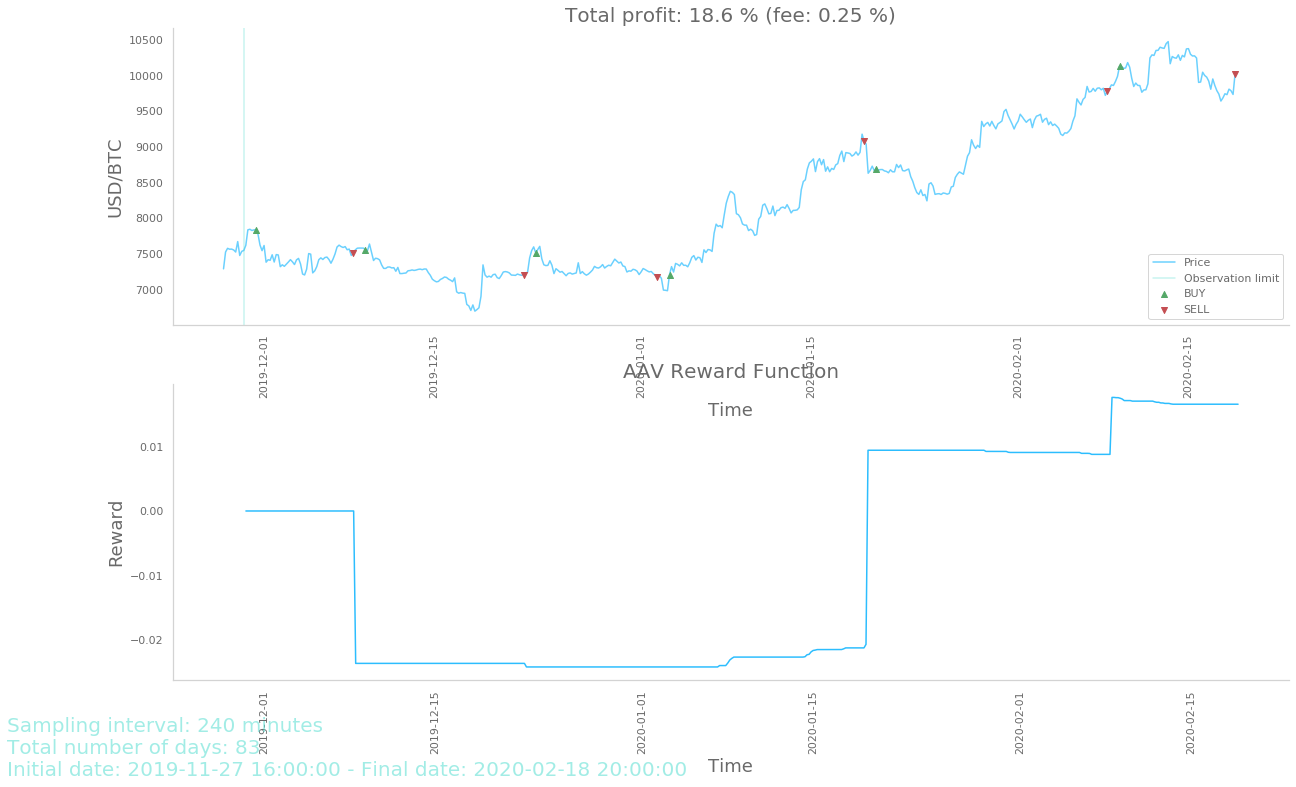

In [5]:
env.render()